<a href="https://colab.research.google.com/github/uhjaehwan/yolov10/blob/main/yolov8_image_jpynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

yolov8로 1.jpg인식하기

🖼️ '1.jpg' 파일을 업로드하세요.


Saving 1.jpg.jfif to 1.jpg (1).jfif

image 1/1 /content/1.jpg: 448x640 8 persons, 1 backpack, 43.4ms
Speed: 18.8ms preprocess, 43.4ms inference, 450.9ms postprocess per image at shape (1, 3, 448, 640)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


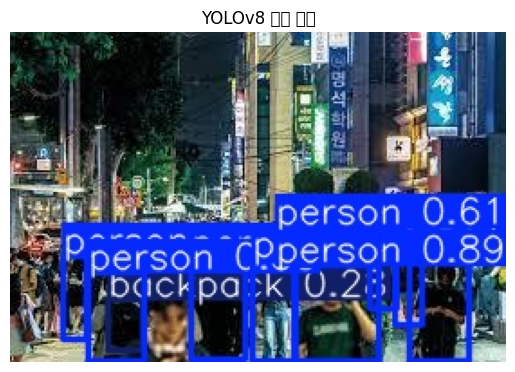

In [ ]:
# 📌 YOLOv8 설치
!pip install -q ultralytics

# 📌 라이브러리 임포트
import os
from PIL import Image
import matplotlib.pyplot as plt
from ultralytics import YOLO
from google.colab import files

# 📁 디렉토리 준비
os.makedirs('/content', exist_ok=True)

# 📥 모델 다운로드
!wget -q https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8n.pt -O /content/yolov8n.pt

# 📤 이미지 업로드
print("🖼️ '1.jpg' 파일을 업로드하세요.")
uploaded = files.upload()  # 1.jpg를 업로드하세요

# ✅ 모델 로드
model = YOLO('/content/yolov8n.pt')

# ✅ 객체 인식 수행
results = model('/content/1.jpg')

# 💾 결과 이미지 저장
output_path = '/content/output.jpg'
results[0].save(filename=output_path)

# 🖼️ 결과 이미지 보여주기
img = Image.open(output_path)
plt.imshow(img)
plt.axis('off')
plt.title("YOLOv8 인식 결과")
plt.show()


In [ ]:
# ✅ 필수 패키지 설치
!pip install -q ultralytics pytube moviepy opencv-python

# ✅ 라이브러리 임포트
from pytube import YouTube
from ultralytics import YOLO
import os
from IPython.display import Video

# ✅ 작업 디렉토리 설정
os.makedirs("/content", exist_ok=True)

# ✅ 1. 유튜브 영상 다운로드
video_url = 'https://www.youtube.com/watch?v=XG2zLlC7FNs'
yt = YouTube(video_url)
stream = yt.streams.filter(file_extension='mp4', progressive=True).order_by('resolution').desc().first()
video_path = stream.download(output_path="/content", filename="input.mp4")
print(f"🎥 유튜브 영상 다운로드 완료: {video_path}")

# ✅ 2. YOLOv8 모델 다운로드
!wget -q https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8n.pt -O /content/yolov8n.pt

# ✅ 3. YOLOv8 객체 인식 수행 (영상)
model = YOLO("/content/yolov8n.pt")
results = model.track(
    source="/content/input.mp4",
    save=True,
    save_txt=False,
    save_conf=False,
    name="detect_results",
    project="/content",
    vid_stride=1
)

# ✅ 4. 결과 영상 경로 확인 및 복사
output_folder = sorted([f for f in os.listdir("/content/detect_results") if os.path.isdir("/content/detect_results/" + f)])[-1]
output_video_path = f"/content/detect_results/{output_folder}/input.mp4"
!cp "{output_video_path}" /content/output.mp4

# ✅ 5. 결과 영상 표시
Video("/content/output.mp4", embed=True)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.8 MB/s eta 0:00:00


HTTPError: HTTP Error 400: Bad Request